# Customer_Segmentation_Clustering-
# Müşteri Segmentasyon Kümeleme

In [13]:
## Satın Alma Alışkanlıkları 

In [1]:
#KMeans En Yakın Komşu Kümelemesi

In [2]:
import pandas as pd
pd.set_option("display.max_columns",200)
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv('PBL5recommendationdata.csv', encoding = "latin-1")

## EDA

In [4]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [6]:
df.describe()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.attributes,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
count,4194.000000,4.194000e+03,101.0,2114.000000,0.0,5.000000,3.000000,0.0,0.0,0.0,4.194000e+03,3771.000000,4194.000000,4194.000000,82.000000,5.000000e+00,0.0,4194.000000,3737.000000,3999.000000,882.000000,882.000000,0.0,0.0,278.000000,364.000000,4194.000000,351.000000,0.0,0.0,3.000000,4189.000000,4.176000e+03,4176.000000,0.0,0.0,4194.000000,4.194000e+03,4.171000e+03,3.848000e+03,0.0,0.0,0.0,0.0,1.0,96.000000,4011.000000,4194.000000,4194.000000,4151.000000,0.0,0.0,4194.000000,4194.000000,4191.000000,0.0,0.0,24.000000,0.0,1008.000000,4037.000000,4037.000000,0.0,4037.000000,4037.000000,0.0,4017.000000,4036.000000,1160.000000,4037.000000,2987.000000,1239.000000,0.0,4.037000e+03,2959.000000,3.130000e+03,3917.000000,0.0,592.000000,0.0,2334.0,2334.0,3.728000e+03,0.0,0.0,0.0,0.0,0.0,2837.0,998.000000,996.000000,996.000000,2.127000e+03,2638.000000,0.0,2920.000000,2786.000000,122.000000,2080.000000,0.0,3998.000000,3998.000000,3998.000000,659.000000,387.000000,0.0,3930.000000,0.0
mean,1796.518121,1.440971e+09,0.0,0.979659,NaN,0.200000,7.333333,NaN,NaN,NaN,1.450401e+09,0.137364,9142.984025,1796.518121,7389.158537,6.018061e+08,NaN,131.925196,0.800838,7.141263,20.403628,9.972676,NaN,NaN,14.752590,13.086676,137.192818,47.981396,NaN,NaN,18.000000,2.958940,1.443104e+09,134.842263,NaN,NaN,1.326180,1.443054e+09,1.449607e+09,1.442167e+09,NaN,NaN,NaN,NaN,1.0,0.010417,0.124159,11156.068670,9142.984025,4451.426162,NaN,NaN,1.858846,67.349132,51.112718,NaN,NaN,1.666667,NaN,1.916667,4518.398068,0.987119,NaN,1.629676,3.400297,NaN,121.683321,74.266043,70.754095,52.318192,9549.464680,5.811138,NaN,1.462428e+09,0.940858,2.865179e+13,61.543528,NaN,89.727855,NaN,199.0,22005.0,1.450329e+09,NaN,NaN,NaN,NaN,NaN,0.0,21.292014,19.191185,13.587992,5.504591e+11,162.885140,NaN,0.166438,65.059943,181.696967,0.064423,NaN,17.208216,10.872750,11.592447,15.487041,3.863049,NaN,0.876336,NaN
s

In [83]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [85]:
df.duplicated().sum()

0

In [86]:
df=df.drop_duplicates()

In [88]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [90]:
df.nunique()

Customers.id             3054
Customers.fname          1631
Customers.lname          2557
Customers.company         425
Customers.create_date    3054
                         ... 
Products.leg_style          0
Products.seat_size         13
Products.family_id       1002
Products.saved_status       2
Products.freight_cost       0
Length: 181, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [35]:
CusSegment=df[["Order_Items.reorder_frequency","Customers.customer_type","Products.price"]]

In [7]:
Customer=df[["Customers.status","Customers.customer_type","Customers.tax_exempt"]]

In [8]:
Orders=df[["Orders.total","Orders.payment_status","Orders.payment_amount","Orders.status"]]

In [9]:
Products=df[["Products.status","Products.price","Products.sale_price","Products.cost","Products.saved_status"]]

In [36]:
CusSegment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Order_Items.reorder_frequency  24 non-null     float64
 1   Customers.customer_type        3771 non-null   float64
 2   Products.price                 4036 non-null   float64
dtypes: float64(3)
memory usage: 98.4 KB


In [37]:
CusSegment.describe()

,Order_Items.reorder_frequency,Customers.customer_type,Products.price
count,24.000000,3771.000000,4036.000000
mean,1.666667,0.137364,74.266043
std,0.916831,0.391842,98.829781
min,1.000000,0.000000,1.540000
25%,1.000000,0.000000,24.400000
50%,1.000000,0.000000,48.245000
75%,2.000000,0.000000,83.360000
max,4.000000,2.000000,1899.000000


In [38]:
CusSegment.shape

(4194, 3)

In [39]:
CusSegment.isnull().sum()

Order_Items.reorder_frequency    4170
Customers.customer_type           423
Products.price                    158
dtype: int64

In [20]:
CusSegment=CusSegment.dropna(axis=1)

In [34]:
CusSegment.shape

(4194, 0)

In [43]:
CusSegment["Products.price"].mean(),CusSegment["Products.price"].min(),df["Products.price"].max(),CusSegment["Products.price"].std()

(74.2660431119918, 1.54, 1899.0, 98.82978106048357)

In [49]:
CusSegment["Order_Items.reorder_frequency"].mean(),
CusSegment["Order_Items.reorder_frequency"].min(),
CusSegment["Order_Items.reorder_frequency"].max(),
CusSegment["Order_Items.reorder_frequency"].std()

0.9168313422570846

In [53]:
CusSegment["Customers.customer_type"].mode()

0    0.0
Name: Customers.customer_type, dtype: float64

In [54]:
##Fillna Boş Verileri Doldur -- Update Cümleciği

CusSegment["Products.price"]=CusSegment["Products.price"].fillna(CusSegment["Products.price"].mean())
CusSegment["Order_Items.reorder_frequency"]=CusSegment["Order_Items.reorder_frequency"].fillna(CusSegment["Order_Items.reorder_frequency"].mean())
CusSegment["Customers.customer_type"]=CusSegment["Customers.customer_type"].fillna(CusSegment["Customers.customer_type"].mean())

In [55]:
CusSegment.isnull().sum()

Order_Items.reorder_frequency    0
Customers.customer_type          0
Products.price                   0
dtype: int64

In [60]:
CusSegment.head()

,Order_Items.reorder_frequency,Customers.customer_type,Products.price
0,1.666667,0.0,57.64
1,1.666667,0.0,10.29
2,1.666667,0.0,68.78
3,1.666667,0.0,19.56
4,1.666667,0.0,36.05


In [91]:
CusSegment["Customers.customer_type"].unique()

array([0.        , 1.        , 0.13736409, 2.        ])

In [62]:
CusSegment["Customers.customer_type"].value_counts()

0.000000    3319
0.137364     423
1.000000     386
2.000000      66
Name: Customers.customer_type, dtype: int64

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

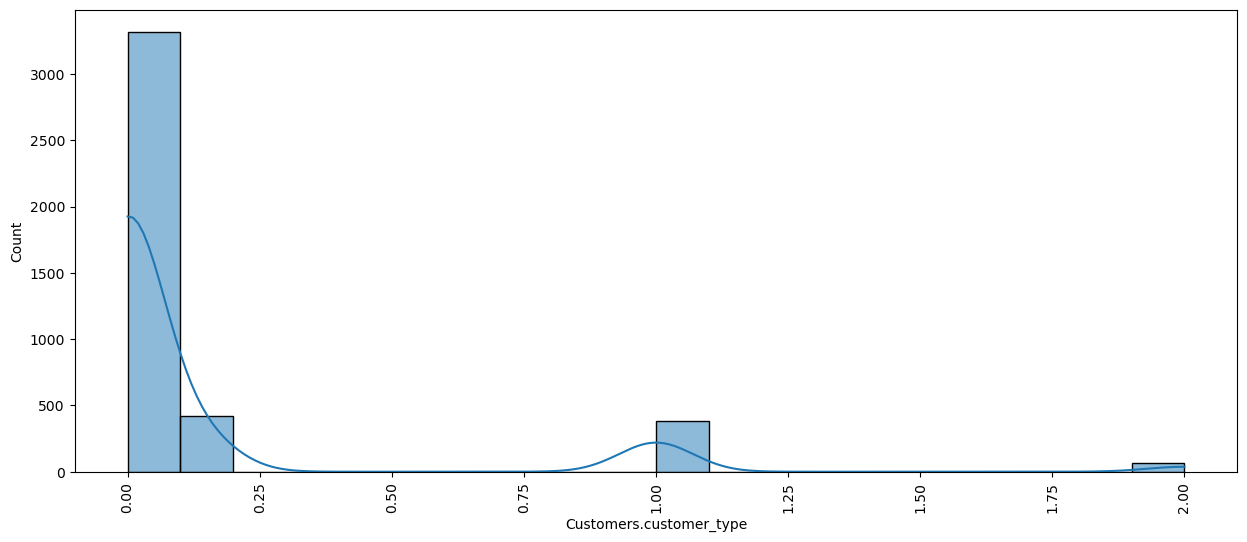

In [111]:
plt.figure(figsize=(15,6))
sns.histplot(CusSegment['Customers.customer_type'], bins = 20, kde = True,
 palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

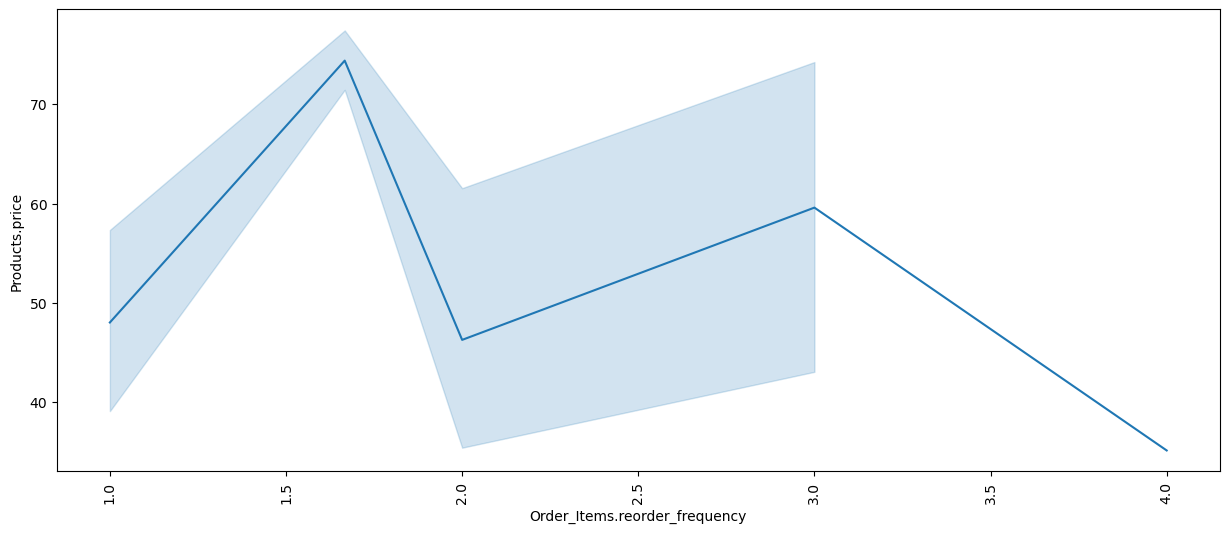

In [112]:
plt.figure(figsize=(15,6))
sns.lineplot(y = CusSegment['Products.price'], x = CusSegment['Order_Items.reorder_frequency'], data = df,
 palette = 'hls')
plt.xticks(rotation = 90)
plt.show()


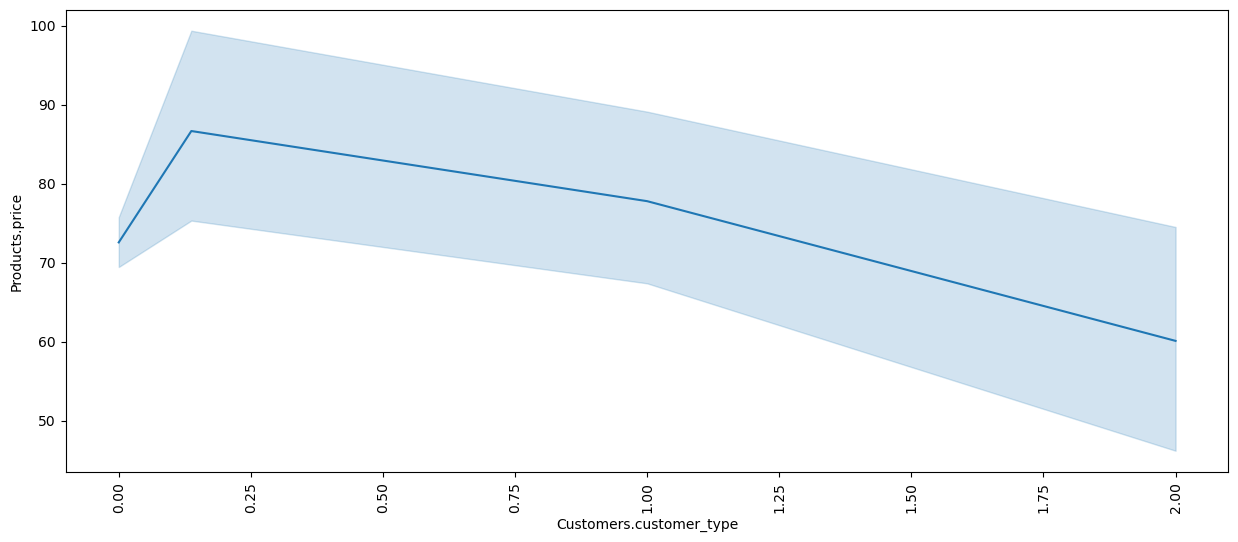

In [113]:
plt.figure(figsize=(15,6))
sns.lineplot(y = CusSegment['Products.price'], x = CusSegment['Customers.customer_type'], data = CusSegment,
 palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

# Modeling

In [56]:
model=KMeans(4)

In [57]:
model=model.fit(CusSegment)

In [58]:
tahmin=model.predict(CusSegment)

In [59]:
tahmin

array([0, 0, 0, ..., 3, 2, 0])

In [63]:
CusSegment['cluster']=tahmin

In [64]:
CusSegment.head()

,Order_Items.reorder_frequency,Customers.customer_type,Products.price,cluster
0,1.666667,0.0,57.64,0
1,1.666667,0.0,10.29,0
2,1.666667,0.0,68.78,0
3,1.666667,0.0,19.56,0
4,1.666667,0.0,36.05,0


In [65]:
silhouette_score(CusSegment,tahmin)

0.7412313867044075

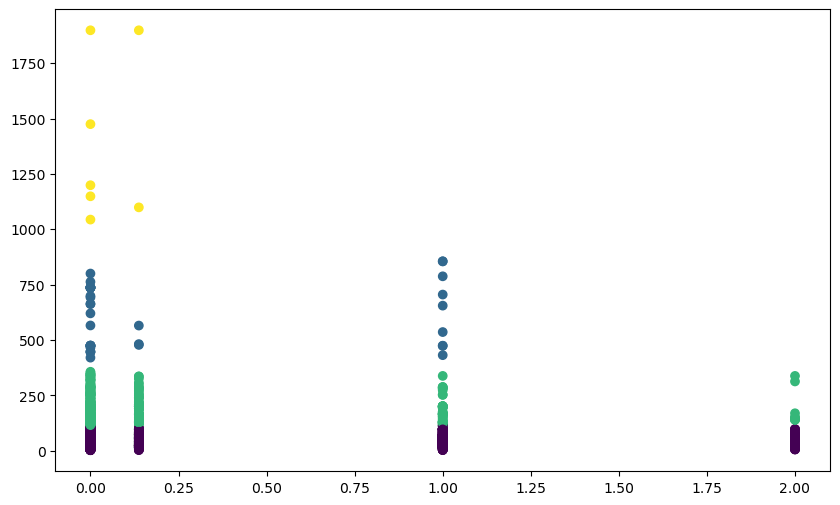

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(CusSegment["Customers.customer_type"],CusSegment["Products.price"],c=tahmin);

In [72]:
allscore=[]
allcluster=[]
distances=[]
def fnc_clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(CusSegment)
        tahmin=model.predict(CusSegment)
        score=silhouette_score(CusSegment,tahmin)
        distance=model.inertia_
        print("Cluster..:",i," Score..:", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [75]:
fnc_clust(20)

Cluster..: 2  Score..: 0.8989798217565564
Cluster..: 3  Score..: 0.7437601874511074
Cluster..: 4  Score..: 0.7412313867044075
Cluster..: 5  Score..: 0.6112612688448616
Cluster..: 6  Score..: 0.6325753689745829
Cluster..: 7  Score..: 0.6328685458326397
Cluster..: 8  Score..: 0.6361031706720713
Cluster..: 9  Score..: 0.6277714225917499
Cluster..: 10  Score..: 0.5966905145488343
Cluster..: 11  Score..: 0.5846000399380785
Cluster..: 12  Score..: 0.584526803274018
Cluster..: 13  Score..: 0.5540115455925473
Cluster..: 14  Score..: 0.5543109099501287
Cluster..: 15  Score..: 0.5971937730833136
Cluster..: 16  Score..: 0.5961013574927251
Cluster..: 17  Score..: 0.5977674788350995
Cluster..: 18  Score..: 0.5833689462306612
Cluster..: 19  Score..: 0.5845422443482531
Cluster..: 20  Score..: 0.5777716801789147


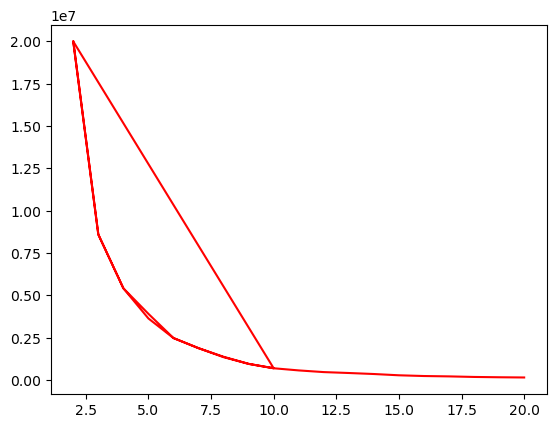

In [76]:
plt.plot(allcluster,distances,color='Red');

# Hierarchical Clustering

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [78]:
link_data=linkage(CusSegment,method="ward",metric="euclidean")

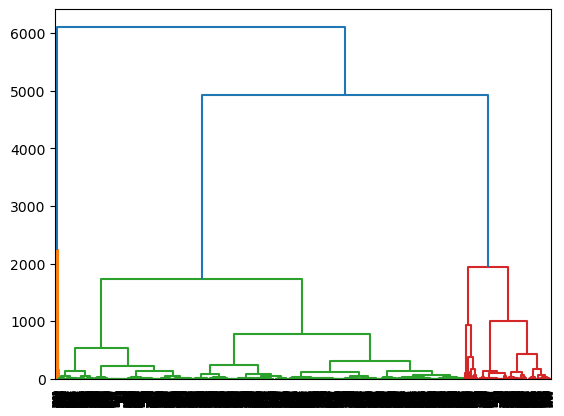

In [79]:
dendrogram(link_data)
plt.show()

In [80]:
from sklearn.cluster import DBSCAN

In [81]:
clusters=DBSCAN(min_samples=4).fit(CusSegment)

In [82]:
set(clusters.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85}